In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
base = pd.read_csv('./dados/base_full.csv')

In [10]:
base = base[base['idade'] >= 10]

In [13]:
base.head()

,uf,sexo,idade,condicao_domiciliar,raca,estado_civil,alfabetizado,estuda,internet_via_celular,trabalha,...,atividade,ocupacao,tipo_familia,situacao_censitaria,anos_de_estudo,componentes_domicilio,rendimento_mensal,nivel_de_instrucao,atividade_agricola,inss
0,Rondonia,1,23,Pessoa de referencia,Parda,Solteiro,1,0,1.0,1.0,...,"Outros servicos coletivos, sociais e pessoais",Trabalhadores dos servicos,Outros tipos de família,Urbana,11 a 14 anos,1.0,Mais de 1 ate 2 salarios minimos,Medio completo ou equivalente,0.0,0
1,Rondonia,0,23,Pessoa de referencia,Branca,Divorciado,1,0,1.0,1.0,...,Outras atividades,Trabalhadores de servicos administrativos,Outros tipos de família,Urbana,11 a 14 anos,1.0,Mais de 1 ate 2 salarios minimos,Medio completo ou equivalente,0.0,0
2,Rondonia,0,35,Pessoa de referencia,Parda,NaN,1,1,1.0,1.0,...,Administração publica,Profissionais das ciencias e das artes,Casal com todos os filhos menores de 14 anos,Urbana,11 a 14 anos,6.0,Mais de 1 ate 2 salarios minimos,Superior incompleto ou equivalente,0.0,0
3,Rondonia,1,34,Conjuge,Parda,NaN,1,0,1.0,1.0,...,Comercio e reparacao,Dirigentes em geral,Casal com todos os filhos menores de 14 anos,Urbana,11 a 14 anos,6.0,Mais de 1 ate 2 salarios minimos,Superior completo,0.0,0
4,Rondonia,0,11,Filho,Parda,Solteiro,1,1,0.0,0.0,...,NaN,NaN,Casal com todos os filhos menores de 14 anos,Urbana,1 a 3 anos,6.0,Mais de 1 ate 2 salarios minimos,Fundamental incompleto ou equivalente,NaN,0


In [15]:
base[base['estado_civil'].isnull()][['condicao_domiciliar', 'idade', 'tipo_familia']]['tipo_familia'].value_counts()

Casal sem filhos                                            29759
Casal com todos os filhos de 14 anos ou mais                29719
Casal com todos os filhos menores de 14 anos                22127
Casal com filhos menores de 14 anos e de 14 anos ou mais     9903
Mae com todos os filhos de 14 anos ou mais                    748
Outros tipos de família                                       627
Mae com todos os filhos menores de 14 anos                     71
Mae com filhos menores de 14 anos e de 14 anos ou mais         26
Name: tipo_familia, dtype: int64

In [21]:
ct = pd.crosstab(columns=base['internet_via_celular'], index=base['estado_civil'], margins=True).T
ct/ct.loc['All']

estado_civil,Casado,Desquitado ou separado judicialmente,Divorciado,Solteiro,Viuvo,All
internet_via_celular,,,,,,
0.0,0.591643,0.591442,0.495942,0.400826,0.870912,0.457409
1.0,0.408357,0.408558,0.504058,0.599174,0.129088,0.542591
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
ct = pd.crosstab(columns=base[base['estado_civil'].isnull()]['internet_via_celular'], index=base[base['estado_civil'].isnull()]['tipo_familia'], margins=True).T
ct/ct.loc['All']

tipo_familia,Casal com filhos menores de 14 anos e de 14 anos ou mais,Casal com todos os filhos de 14 anos ou mais,Casal com todos os filhos menores de 14 anos,Casal sem filhos,Mae com filhos menores de 14 anos e de 14 anos ou mais,Mae com todos os filhos de 14 anos ou mais,Mae com todos os filhos menores de 14 anos,Outros tipos de família,All
internet_via_celular,,,,,,,,,
0.0,0.46804,0.622767,0.30578,0.657751,0.461538,0.359626,0.450704,0.60925,0.539664
1.0,0.53196,0.377233,0.69422,0.342249,0.538462,0.640374,0.549296,0.39075,0.460336
All,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


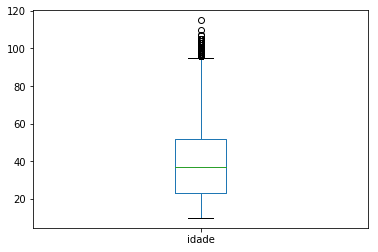

In [25]:
base['idade'].plot.box()

C:\Users\pedro.correia\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


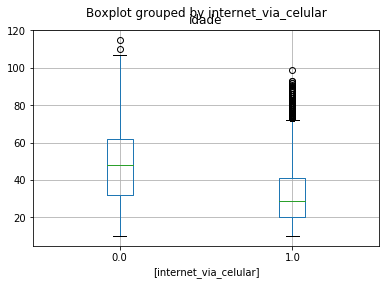

In [27]:
base.boxplot(column=['idade'], by=['internet_via_celular'])

In [28]:
base.columns

Index(['uf', 'sexo', 'idade', 'condicao_domiciliar', 'raca', 'estado_civil',
       'alfabetizado', 'estuda', 'internet_via_celular', 'trabalha',
       'idade_inicio_trabalho', 'responsavel_afazeres_domesticos',
       'horas_semanais_trabalho', 'ativo_economicamente', 'ocupado',
       'posicao_trabalho', 'atividade', 'ocupacao', 'tipo_familia',
       'situacao_censitaria', 'anos_de_estudo', 'componentes_domicilio',
       'rendimento_mensal', 'nivel_de_instrucao', 'atividade_agricola',
       'inss'],
      dtype='object')

In [31]:
base['idade_inicio_trabalho'].value_counts(dropna=False)

NaN                128768
10 a 14 anos        60594
15 a 17 anos        52651
18 a 19 anos        31152
Ate 9 anos          16235
20 a 24 anos        14987
25 a 29 anos         2816
30 anos ou mais      1396
Name: idade_inicio_trabalho, dtype: int64

In [34]:
pd.qcut(base['idade'], 10)

0          (20.0, 26.0]
1          (20.0, 26.0]
2          (31.0, 37.0]
3          (31.0, 37.0]
4         (9.999, 15.0]
7          (15.0, 20.0]
8          (42.0, 49.0]
9         (65.0, 115.0]
10        (65.0, 115.0]
11         (42.0, 49.0]
12         (20.0, 26.0]
13         (26.0, 31.0]
14         (49.0, 56.0]
16         (31.0, 37.0]
17         (31.0, 37.0]
18         (15.0, 20.0]
19        (9.999, 15.0]
21         (56.0, 65.0]
22         (49.0, 56.0]
23         (15.0, 20.0]
24         (56.0, 65.0]
25         (49.0, 56.0]
26         (26.0, 31.0]
27         (20.0, 26.0]
28         (15.0, 20.0]
30         (49.0, 56.0]
31         (42.0, 49.0]
32        (9.999, 15.0]
33         (20.0, 26.0]
35         (42.0, 49.0]
              ...      
356865     (49.0, 56.0]
356866     (49.0, 56.0]
356867     (42.0, 49.0]
356868     (31.0, 37.0]
356869     (15.0, 20.0]
356870    (9.999, 15.0]
356871     (42.0, 49.0]
356872     (20.0, 26.0]
356873     (15.0, 20.0]
356874    (9.999, 15.0]
356875     (49.0